In [1]:
import polars as pl
import matplotlib.pyplot as plt
file_path = r'C:\Users\ramya\Downloads\openpolicing.parquet'
lf = pl.scan_parquet(file_path)

In [2]:
lf.columns

C:\Users\ramya\AppData\Local\Temp\ipykernel_10200\3701027225.py:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  lf.columns


['date',
 'time',
 'location',
 'county_name',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'department_name',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'contraband_drugs',
 'contraband_weapons',
 'frisk_performed',
 'search_conducted',
 'search_person',
 'search_vehicle',
 'search_basis',
 'reason_for_frisk',
 'reason_for_search',
 'reason_for_stop',
 'violation',
 'vehicle_color',
 'vehicle_make',
 'vehicle_model',
 'vehicle_registration_state',
 'vehicle_year',
 'service_area',
 'officer_race',
 'lat',
 'lng',
 'geocode_source',
 'beat',
 'division',
 'officer_sex',
 'disposition',
 'posted_speed',
 'district',
 'precinct',
 'speed',
 'contraband_other',
 'vehicle_type',
 'officer_age',
 'officer_years_of_service',
 'unit',
 'notes',
 'sector',
 'subsector',
 'officer_assignment',
 'use_of_force_description',
 'department_id',
 'contraband_alcohol',
 'zone',
 'region',
 'neighborhood',
 'reporting_area'

In [4]:
# statistical differences between regions

invalid = ['None']
arr = lf.filter(~pl.col('region').is_in(invalid)).select(pl.col('region').unique()).collect()
regions = arr["region"].to_list()
regions

['8',
 '3',
 'METROPOLITAN DIVISN',
 'SEVENTY-SEVENTH',
 'ANTI-TERRORIST',
 'DEVONSHIRE',
 'JAIL DIVISION',
 'NORTH HOLLYWOOD',
 'FOOTHILL',
 'FINANCIAL CRIMES',
 'SCH INVEST BUY UNIT',
 'DET SUPPORT',
 'OLYMPIC',
 'DET HDQTR',
 'TRAINING DIVISION',
 'FORCE INV.DIV.(FID)',
 'INTERNAL AFFAIRS',
 'NEWTON',
 '4',
 '1',
 'BURGLARY/AUTO THEFT',
 'AIR SUPPORT',
 'VLLY BUR JUV NARCS',
 'WEST LA',
 'VAN NUYS',
 'MAJOR CRIMES',
 'OHB',
 'SOUTHCOAST',
 '9',
 'TOPANGA',
 'CHIEF OF STAFF',
 'OFFICE OF OPERATION',
 'GENERAL SERV POLICE',
 'AUDIT DIVISION',
 'UNIFORMED SUPPORT',
 'VALLEY TRAFFIC',
 'SOUTHEAST',
 'NORTHEAST',
 'MISSION',
 'COMPLAINT INV BUY',
 'EMERGENCY CMD CNTRL',
 'RAMPART',
 '2',
 'TRANSIT GROUP',
 'INFORMATION TECH',
 'NORTH EAST',
 'SOUTH BUREAU',
 'VALLEY BUREAU',
 'CENTRAL BUREAU',
 'CENT BUR JUV NARCS',
 '7',
 'NARCOTICS DIVISION',
 'PERSONNEL ABSENCE',
 'SO BUREAU HOMICIDE',
 '0',
 'FUGITIVE SECTION',
 '**UNUSED PIU CODE**',
 '5',
 'ASIAN CRIME INVEST.',
 'NOISE ENFORCE (TC

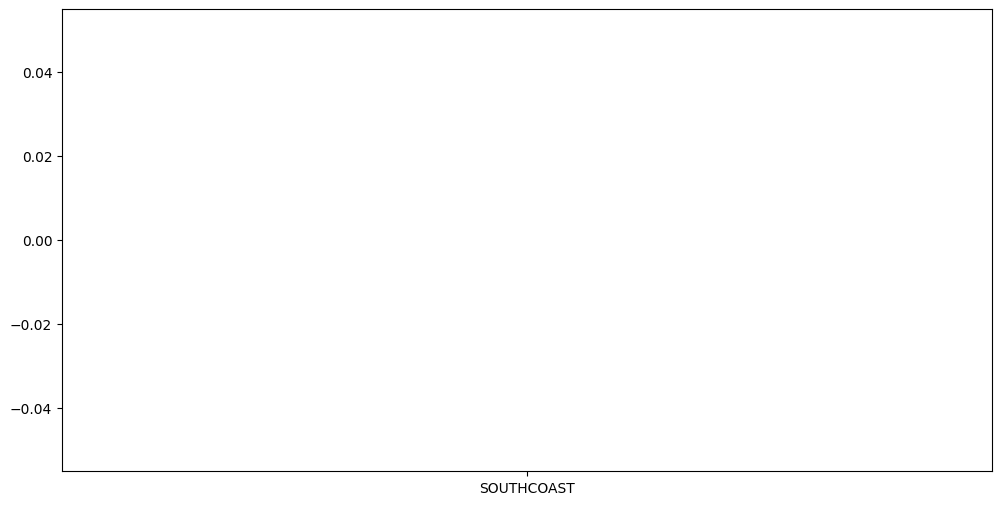

In [ ]:
# i want to go through each row, see what the region is and what the arrest_made value is and then plot it on the corresponding region and at 0 or 1 depending on whether arrest made or not
df = lf.filter(~pl.col('region').is_in(invalid)).select(['region', 'arrest_made']).collect()

regions = df['region'].to_list()
arrests = df['arrest_made'].to_list()

plt.figure(figsize=(12, 6))
plt.scatter(regions, arrests)
plt.yticks([0, 1], ["True", "False"])

In [16]:
# statistical differences between locations
locations = lf.select(pl.col('location').unique()).collect()
locations_arr = locations['location'].to_list()
locations_arr

['ST RT 78 AT RUHLMAN RD|78|2 - STATE',
 'NE 36TH/SL DR',
 'MILAM AND WALKER WB',
 'GA 109 MM3, GREENVILLE',
 'MIDDLEPOINT & EVANS',
 'GRANT AVE @ MAPLE AVE',
 '1900 Blk Of High St',
 '16500  N MAY',
 'M44 1-1/2 NO C49 SB #1 L68',
 'route: 0061, milepost: 722',
 '15500 PARK ROW DRIVE',
 '3 EAST OF 169 92 WB',
 'E Tompkins St and N High St',
 '3200 NE 10',
 'I-80 WB M 105',
 '5127 AMALIE DR, NASHVILLE, TN, 37211',
 '7100 NORTH AV W',
 '16XX WESTFORD RD',
 'BROADWAY / RESERVE',
 'I90 MM 449 WB, BILLINGS',
 'NB HWY 30 S OF DUNLAP',
 'I94W 014   EMF',
 'I 20 WEST@ 1/4 MILE E OF LEE STREET, ATLANTA',
 '8503 US-19, BACONTON',
 'E Alameda Ave / E Fairmount Dr',
 '85B - WCR9, East Bypass',
 'LEONARDTOWN RD / JAMESON DR',
 'route: HIGHLINE B',
 '58 AND VIKING  NB',
 '8, RNW24, 31',
 '2200 HOGG',
 '900 W DALLAS ST',
 '5, H149, 62',
 '4713 S LOOP 289 E, LU',
 '3500-blk N Irving St',
 'W 54TH ST&MADISON AVE',
 'GEARY / 12TH ST',
 'BRITTON/LKHEFPKWY',
 '8372 HUFFINE LN',
 'I-684 N|TSPK|9 - PARKWAY'

In [ ]:
# statistical differences between time ranges
regions = lf.filter(~pl.col('region').is_in(invalid_regions)).select(pl.col("region").unique()).collect()
regions_arr = regions["region"].to_list()
regions_arr